<a href="https://colab.research.google.com/github/katerinakazantseva/scientific_python/blob/master/Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. In the model RAW264_7.xml please define minimal medium that can maintain cell growth in anaerobic conditions. Compare it with the minimal medium that can maintain cell growth in aerobic conditions. Visualize and describe these differences.


In [180]:
%%capture
!pip install cobra

import cobra
model = cobra.io.read_sbml_model("RAW264_7.xml")


In [ ]:
model

Name,
Memory address,0x07f7f1ce4f250
Number of metabolites,1005
Number of reactions,1389
Number of groups,75
Objective expression,1.0*biomass - 1.0*biomass_reverse_01e59
Compartments,"Cytoplasm, Lysosome, Mitochondrion, Extracellular, Peroxisome, Endoplasmic_reticulum, Nucleus, Golgi"


In [194]:
from cobra.medium import minimal_medium

max_growth = model.slim_optimize()
aer=minimal_medium(model, max_growth)

In [195]:
model2=model
medium = model2.medium
medium["EX_o2_LPAREN_e_RPAREN_"] = 0.0
model2.medium = medium

max_growth = model2.slim_optimize()
anaer=minimal_medium(model2, max_growth)


In [ ]:
import numpy as np
import pandas as pd

frame = { 'Names': aer.index,'Aerobic': aer, 'Anaerobic': anaer }
result = pd.DataFrame(frame)
result

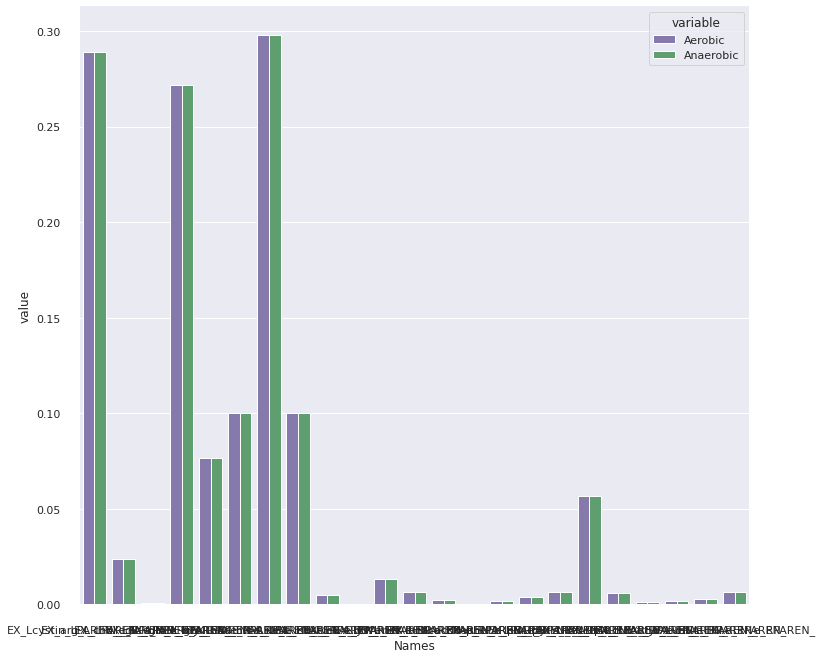

In [197]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")


formatted_df = pd.melt(
    frame = result,
    id_vars = "Names")


sns.set(rc={'figure.figsize':(12,11)})
sns.barplot(x='Names', y='value',
            hue="variable", palette=["m", "g"],
            data=formatted_df)
sns.despine(offset=10, trim=True)


2. For the load_breast_cancer dataset from sklearn.datasets build classification models by the means of Logistic Regression and Decision Trees. Compare the results obtained by these two models (remember how we perform classification problem results). List the features that were defined by each of the models as the most important. Select the most optimal model and justify your choice.


In [204]:
#!pip  install sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from termcolor import colored as cl # text customization
import itertools 
from sklearn.datasets import load_breast_cancer


data=sklearn.datasets.load_breast_cancer(return_X_y=False)

In [208]:
X=data.data
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y)
LR=LogisticRegression(solver = 'liblinear')

LR.fit(X_train,y_train)
LR.score(X_test,y_test)
yhat = LR.predict(X_test)

lr=LR.fit(X_train,y_train)

LR.coef_

array([[ 2.11887008,  0.11550725, -0.06441018, -0.00432319, -0.13521092,
        -0.38961634, -0.59111924, -0.30746556, -0.13393049, -0.02580209,
        -0.04725712,  1.30143341,  0.29799395, -0.12569971, -0.01396657,
        -0.02822608, -0.05232648, -0.03417824, -0.0191996 , -0.00400314,
         1.24103962, -0.32350549, -0.15174287, -0.01984922, -0.26850368,
        -1.08962629, -1.48522759, -0.57921159, -0.4607681 , -0.13115276]])

In [209]:
print(cl(classification_report(y_test, yhat), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.96      0.99      0.97        90

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



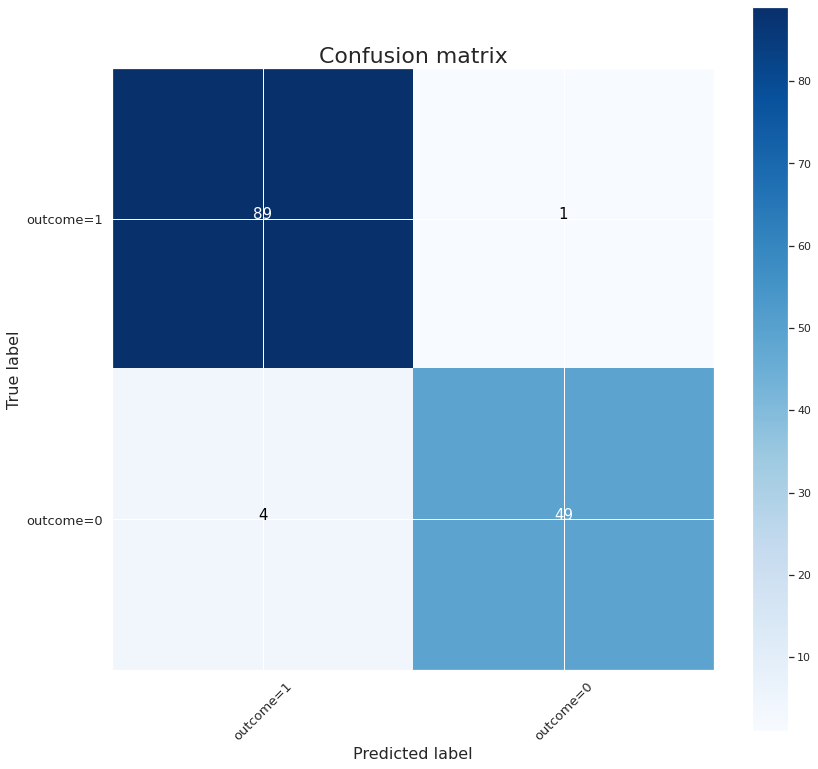

In [210]:
def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)


# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes = ['outcome=1','outcome=0'], 
                      normalize = False,  
                      title = 'Confusion matrix')

Text(0.5, 1.0, 'LogisticRegression')

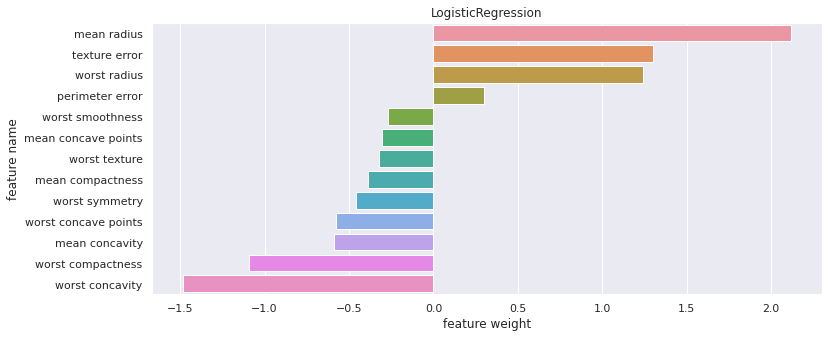

In [211]:
plt.figure(figsize=(12, 5))
data = pd.DataFrame()
from sklearn.datasets import load_breast_cancer
data['feature weight'] = LR.coef_[0]
data['feature name'] = load_breast_cancer().feature_names
data = data[np.abs(data['feature weight']) > 0.25]
data = data.sort_values(by='feature weight', ascending=False)
sns.barplot(x='feature weight', y='feature name', data=data)
plt.title('LogisticRegression')

In [212]:
from sklearn.tree import (
    DecisionTreeClassifier,
    export_graphviz,
    )
import graphviz
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
from IPython.display import SVG

def build_tree(max_depth=None):
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, y_train)
    print("Max Depth: {0}".format(max_depth))
    print("Training Accuracy: {0:.2f}".format(tree.score(X_train, y_train)))
    print("Testing Accuracy: {0:.2f}".format(tree.score(X_test, y_test)))
    print()
    return

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
DT=tree.fit(X_train, y_train)


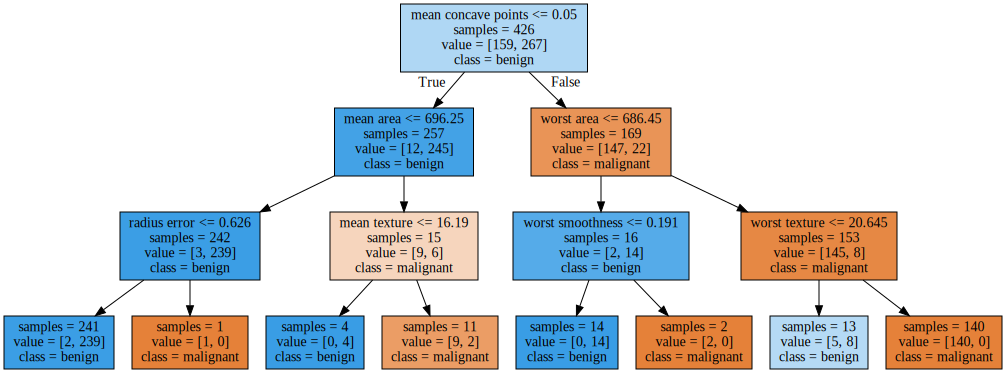

In [213]:
graph = Source(export_graphviz(tree, out_file=None, class_names=load_breast_cancer().target_names,
                feature_names=load_breast_cancer().feature_names, impurity=False,
                filled=True))

display(SVG(graph.pipe(format='svg')))

Text(0.5, 1.0, 'DecisionTreeClassifier')

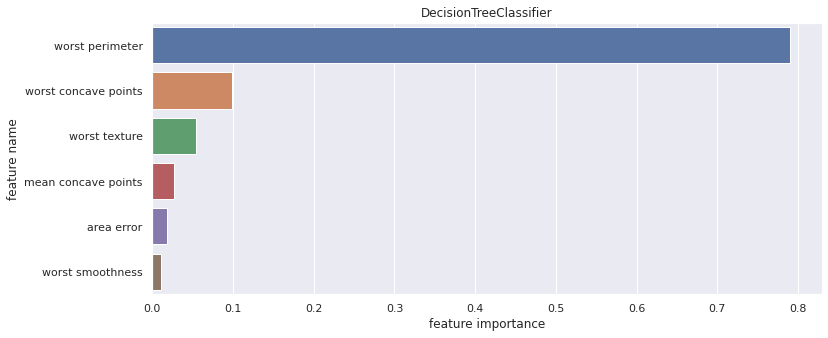

In [ ]:

plt.figure(figsize=(12, 5))
data = pd.DataFrame()
data['feature importance'] = tree.feature_importances_
data['feature name'] = load_breast_cancer().feature_names
data = data[data['feature importance'] != 0]
data = data.sort_values(by='feature importance', ascending=False)
sns.barplot(x='feature importance', y='feature name', data=data)
plt.title('DecisionTreeClassifier')

In [214]:
print(classification_report(y_test, DT.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        53
           1       0.90      0.94      0.92        90

    accuracy                           0.90       143
   macro avg       0.90      0.89      0.89       143
weighted avg       0.90      0.90      0.90       143




3. By the means of Biopython build the phylogenetic tree for the sequences from aeromonade.fasta file. Also find some region that could differentiate LC499765.1 from other sequences and draw ~20bp consensus logo for this region.

In [215]:
#!pip install Bio
from Bio import Phylo

In [216]:
from Bio.Align.Applications import ClustalwCommandline
clustalw = "clustalw2.exe"

cline = ClustalwCommandline("clustalw", infile="aeromonade.fasta", outfile="aeromonade.aln")
print (cline)



clustalw -infile=aeromonade.fasta -outfile=aeromonade.aln


In [217]:
from Bio import Phylo
tree = Phylo.read("aeromonade.dnd", "newick")
Phylo.draw_ascii(tree)

                                    ______________________________ LC499765.1
  _________________________________|
 |                                 | MN493074.1
 |
_|                     ________ MG063201.1
 |____________________|
 |                    | NR_112838.1
 |
 | NR_044845.1



Also find some region that could differentiate LC499765.1 from other sequences and draw ~20bp consensus logo for this region.


In [222]:
from Bio import AlignIO
align = AlignIO.read("aeromonade.aln", "clustal")


for n in range(0,len(align)-1):
  print(align[n].id, align[n].seq)



MG063201.1 --------------------------------------GACTA-CACATGCAAGTCGAGCGGCAGCGGGAAAGTAGCTTGCTACTTTTGCCGGCGAGCGGCGGACGGGTGAGTAATGCCTGGGGATCTGCCCAGTCGAGGGGGATAACTACTGGAAACGGTAGCTAATACCGCATACGCCCTACGGGGGAAAGCAGGGGACCTTCGGGCCTTGCGCGATTGGATGAACCCAGGTGGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCCTAGCTGGTCTGAGAGGATGATCAGCCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCCATGCCGCGTGTGTGAAGAAGGCCTTCGGGTTGTAAAGCACTTTCAGCGAGGAGGAAAGGTTGGTAGCTAATAACTGCCAGCTGTGACGTTACTCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTGGATAAGTTAGATGTGAAATCCCCGGGCTCAACCTGGGAATTGCATTTAAAACTGTCCAGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAAAGACTGACGCTCAGGTGAGAAAGCGTGGGGAGCAAACAGGATTAGATACCGTGGTAGTCCACGCCGTAAACGATGTCGATTTGGAGGCTGTGTCCTTGAGACGTGGTTTCCGGAGCTAACGCGTTAAATTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGATGCAACGCGAAGAACCTTACCTGGCCTTGA

Find region

In [228]:
from Bio import motifs 
from Bio.Seq import Seq 
from Bio import SeqIO 
records = SeqIO.parse("aeromonade.fasta", "fasta")
from skbio import Sequence

DNA_motif = list()
max_d=0

for i in range (0,len(align[0].seq)-21):
  if align[0].seq[i:i+21].find("-")==-1 & align[1].seq[i:i+21].find("-")==-1 & align[2].seq[i:i+21].find("-")==-1 & align[3].seq[i:i+21].find("-")==-1 :
    #print(i)
    DNA_motif = list()
    for n in range(0,len(align)-2):
      DNA_motif.append(align[n].seq[i:i+21])
    m = motifs.create(DNA_motif) 
    consensus=Sequence(repr(m.consensus))
    seq=repr(align[4].seq[i:i+21])
    if consensus.distance(seq)>max_d:
      max_d=consensus.distance(seq)
      res=i
  else:
   pass



In [229]:
print(res)
print(max_d)

450
0.2857142857142857


Find motif

In [230]:
DNA_motif = list()
for n in range(0,len(align)-1):
  DNA_motif.append(align[n].seq[res:res+21])
  print(align[n].seq[res:res+21])


seq = motifs.create(DNA_motif)
seq.weblogo("seq.png") 
  

TTGGTAGCTAATAACTGCCAG
TTGGTAGCTAATAACTGCCAG
TTGGTAGCTAATAACTGCCAG
TTGGCGCCTAATACGTGTCAA


In [227]:
seq.weblogo("seq.png")
